In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df1 = pd.read_csv("Sales_data/Sales_January_2019.csv")
df2 = pd.read_csv("Sales_data/Sales_February_2019.csv")
df3 = pd.read_csv("Sales_data/Sales_March_2019.csv")
df4 = pd.read_csv("Sales_data/Sales_April_2019.csv")
df5 = pd.read_csv("Sales_data/Sales_May_2019.csv")
df6 = pd.read_csv("Sales_data/Sales_June_2019.csv")
df7 = pd.read_csv("Sales_data/Sales_July_2019.csv")
df8 = pd.read_csv("Sales_data/Sales_August_2019.csv")
df9 = pd.read_csv("Sales_data/Sales_September_2019.csv")
df10 = pd.read_csv("Sales_data/Sales_October_2019.csv")
df11 = pd.read_csv("Sales_data/Sales_November_2019.csv")
df12 = pd.read_csv("Sales_data/Sales_December_2019.csv")

In [3]:
df_final = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])
df_final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [4]:
df_final.reset_index(drop=True, inplace = True)
# Note : upar wale me, number of rows = 186850 and index = 25116
# iss wale me, number of rows = index + 1

# reason why
# By default, when resetting the index using the reset_index() method, 
# the old index is preserved as a new column in the DataFrame, 
# and a new continuous index is assigned. 
# However, setting drop=True will prevent the old index from being added as a new column and instead remove it from the DataFrame.

In [53]:
# alternate way

df = pd.DataFrame()
for i in os.listdir("Sales_Data/"):
    sales_data = pd.read_csv("Sales_data/" + i)
    df = pd.concat([df, sales_data])
    
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [54]:
df.reset_index(drop = True, inplace = True)

## Data Cleaning

In [55]:
df_final.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Order Month         0
Sales               0
City                0
Month               0
time                0
dtype: int64

In [56]:
df_final = df_final.dropna()

In [57]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Order Month       185950 non-null  int32  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Month             185950 non-null  int32  
 10  time              185950 non-null  object 
dtypes: float64(2), int32(3), object(6)
memory usage: 14.9+ MB


## Month-wise Sales

In [58]:
df_final['Order Date'].dtype

dtype('O')

In [59]:
df_final['Order Month'] = df_final['Order Date'].apply(lambda x: str(x)[:2])

In [60]:
df_final = df_final[df_final['Order Month'] != 'Or']

In [61]:
df_final['Order Month'] = df_final['Order Month'].astype('int')

In [62]:
df_final['Quantity Ordered'] = df_final['Quantity Ordered'].astype('int')
df_final['Price Each'] = df_final['Price Each'].astype('float')

In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Order Month       185950 non-null  int32  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Month             185950 non-null  int32  
 10  time              185950 non-null  object 
dtypes: float64(2), int32(3), object(6)
memory usage: 14.9+ MB


In [64]:
df_final['Sales'] = df_final[['Quantity Ordered','Price Each']].apply(lambda x : x[0]*x[1], axis = 1)

In [65]:
df_final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Month,time
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,1,21:25:00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,1,14:15:00
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,1,13:33:00
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,1,20:33:00
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,1,11:59:00
...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco,12,20:58:00
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles,12,12:01:00
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle,12,06:43:00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas,12,10:39:00


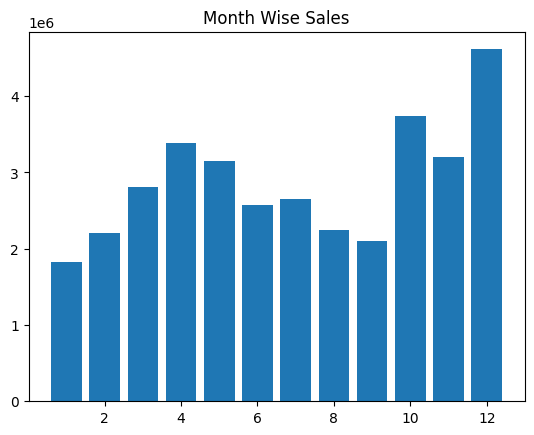

In [66]:
df_month_sales = df_final.groupby('Order Month')['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False)
plt.bar(df_month_sales['Order Month'],df_month_sales['Sales'])
plt.title("Month Wise Sales")
plt.show()

### what city has the highest number of sales

In [67]:
df_final['City'] = df_final['Purchase Address'].apply(lambda x : x.split(",")[1])

In [68]:
df_sales_city = df_final.groupby(['City'])['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False)
df_sales_city

,City,Sales
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58
3,Dallas,2767975.40
8,Seattle,2747755.48
6,Portland,2320490.61
1,Austin,1819581.75


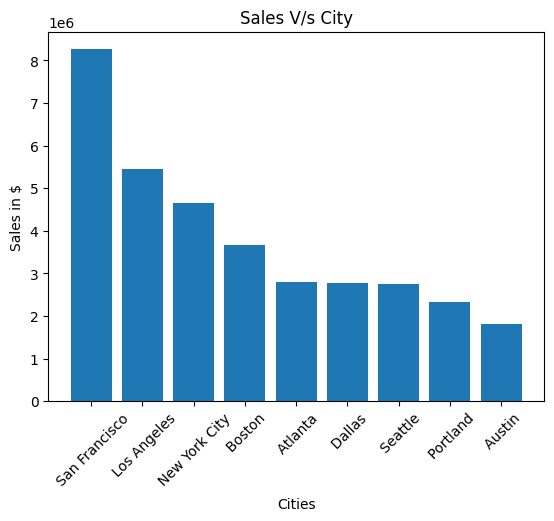

In [69]:
plt.title("Sales V/s City")
plt.xlabel("Cities")
plt.xticks(rotation = 45)
plt.ylabel("Sales in $")
plt.bar(df_sales_city['City'], df_sales_city['Sales'])
plt.show()

### What time of advertisement to increase likelihood of buying

In [70]:
df_final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Month,time
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,1,21:25:00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,1,14:15:00
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,1,13:33:00
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,1,20:33:00
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,1,11:59:00


In [81]:
df_final['Order Time'] = pd.to_datetime(df_final['Order Date'], format='%m/%d/%y %H:%M')
df_final['Order Hour'] = df_final['Order Time'].dt.hour

In [82]:
df_final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Month,time,Order Time,Order Hour
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,1,2019-01-22 21:25:00,2019-01-22 21:25:00,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,1,2019-01-28 14:15:00,2019-01-28 14:15:00,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,1,2019-01-17 13:33:00,2019-01-17 13:33:00,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,1,2019-01-05 20:33:00,2019-01-05 20:33:00,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,1,2019-01-25 11:59:00,2019-01-25 11:59:00,11


In [83]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  object        
 5   Purchase Address  185950 non-null  object        
 6   Order Month       185950 non-null  int32         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Month             185950 non-null  int32         
 10  time              185950 non-null  datetime64[ns]
 11  Order Time        185950 non-null  datetime64[ns]
 12  Order Hour        185950 non-null  int32         
dtypes: datetime64[ns](2), float64(2), int32(4), object(5)
memory usa

In [84]:
def get_time_range(time):
    x = time
    if x >= 20:
        return "20-24"
    elif x < 20 and x >= 16:
        return "16-20"
    elif x < 16 and x >= 12:
        return "12-16"
    elif x < 12 and x >= 8:
        return "8-12"
    elif x < 8 and x >= 4:
        return "4-8"
    elif x < 4 and x >= 0:
        return "0-4"
    else:
        return "other"


df_final['time range'] = df_final['Order Hour'].apply(get_time_range)

In [86]:
df_final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Month,time,Order Time,Order Hour,time range
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,1,2019-01-22 21:25:00,2019-01-22 21:25:00,21,20-24
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,1,2019-01-28 14:15:00,2019-01-28 14:15:00,14,12-16
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,1,2019-01-17 13:33:00,2019-01-17 13:33:00,13,12-16
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,1,2019-01-05 20:33:00,2019-01-05 20:33:00,20,20-24
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,1,2019-01-25 11:59:00,2019-01-25 11:59:00,11,8-12


In [88]:
## drop extra columns

df_final.drop(['time', 'Order Hour'], axis = 1, inplace = True)

In [89]:
df_final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Month,Order Time,time range
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,1,2019-01-22 21:25:00,20-24
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland,1,2019-01-28 14:15:00,12-16
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,1,2019-01-17 13:33:00,12-16
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,1,2019-01-05 20:33:00,20-24
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin,1,2019-01-25 11:59:00,8-12


In [93]:
df_sales_time = df_final.groupby('time range')['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False)

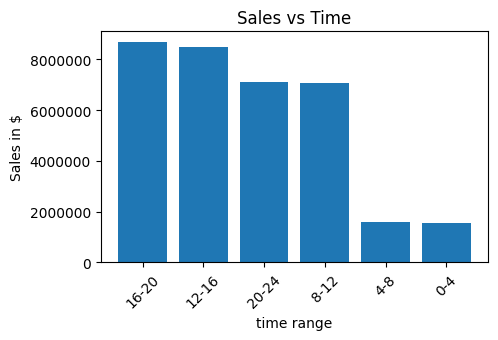

In [107]:
plt.figure(figsize = (5,3))
plt.title("Sales vs Time")
plt.xlabel("time range")
plt.ylabel("Sales in $")
plt.xticks(rotation = 45)

# Disable scientific notation for both x-axis and y-axis tick labels
plt.ticklabel_format(style='plain', useOffset=False)

plt.bar(df_sales_time['time range'], df_sales_time['Sales'])
plt.show()

## Q4 : What products are often sold together

## Q5 : What products sold the most and why you think it sold

In [112]:
df_final.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values(by = 'Quantity Ordered', ascending = False).head()

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557


### Rough

In [21]:
df_final.dropna(inplace = True)

In [22]:
df_final = df_final[df_final['Order Date'] != 'Order Date']

In [23]:
df_final['Month'] = df_final['Order Date'].apply(lambda x : x[:2])

In [24]:
df_final['Month'] = df_final['Month'].astype('int')
df_final['Quantity Ordered'] = df_final['Quantity Ordered'].astype('int')
df_final['Price Each'] = df_final['Price Each'].astype('float')

In [25]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Order Month       185950 non-null  int32  
 7   Sales             185950 non-null  float64
 8   City              185950 non-null  object 
 9   Month             185950 non-null  int32  
dtypes: float64(2), int32(3), object(5)
memory usage: 13.5+ MB


In [26]:
df_final['Sales'] = df_final['Quantity Ordered'] * df_final['Price Each']

In [27]:
df_final.groupby('Month')['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False)

,Month,Sales
11,12,4613443.34
9,10,3736726.88
3,4,3390670.24
10,11,3199603.20
4,5,3152606.75
2,3,2807100.38
6,7,2647775.76
5,6,2577802.26
7,8,2244467.88
1,2,2202022.42
